<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Briam Pavel Aguirre Moisés  <br>
Fecha: 29/05/2023

# Importación de librerias necesarias

# Parte I. Regresión

In [45]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [46]:
#Código para cargar el Dataset
#url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df_train = pd.read_csv("USA_Housing.csv")
df_train.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Descripción de la fuente del Dataset

La fuente de datos fue extraída del siguiente sitio web:
https://www.kaggle.com/datasets/vedavyasv/usa-housing

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

**Descripción del problema:** En este caso se quiere predecir el precio de una casa en base a seis variables explicativas: ingreso, antigüedad de la casa, cantidad de habitaciones, cantidad de dormitorios, población y dirección.

**Tipo de problema:** Problema de regresión.

**Variable objetivo:** Price.

**Variables de entrada:** Avg.Area_Income, Avg.Area_House_Age, Avg.Area_number_of_rooms, Avg.Area_number_of_bedrooms, Area population y Address.

**Utilidad de la solución:** El modelo podrá predecir el precio de las casas en base a las varaibles explicativas.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [47]:
df_train.shape[0]

5000

**Número de instancias en total:** Se tiene en total 5000 instancias en nuestro dataset.

In [48]:
df_train.shape[1]

7

**Número de atributos de entrada:** Se tiene en total 6 variables independientes y una explicativa, se detalla a continuación su significado y tipo

- **Avg.Area_Income:** Ingresos promedio por área (numérica continua).
- **Avg.Area_House_Age:** Antiguedad de las casas en promedio por área (numérica continua).
- **Avg.Area_Number_of_Rooms:** Número de habitaciones promedio por área (numérica continua).
- **Avg.Area_Number_of_Bedrooms:** Número de dormitorios promedio por área (numérica continua).
- **Area_Population:** Población del área (numérica continua).
- **Price:** Precio (numérica continua).
- **Address:** Dirección (categórica nominal).


In [49]:
df_train["Avg. Area Income"].describe()

count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64

**Estadísticas de la variable objetiva**

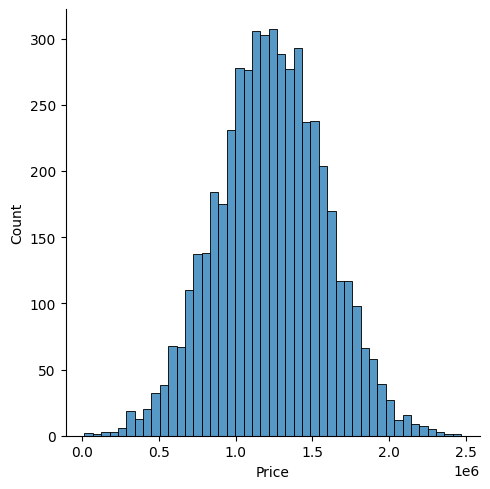

In [50]:
sns.displot(df_train["Price"])

Se muestra una distribución lineal en los precios, sin colas pronunciadas. Sin embargo, graficaremos un boxplot para determinar valores atípicos.

<Axes: >

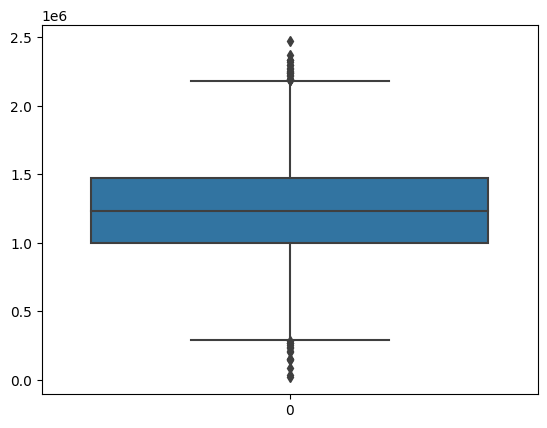

In [51]:
sns.boxplot(df_train["Price"])

Se muestra que el precio tiene valores atípicos en las dos colas; es decir, existen casas con precios muy elevados, así como también casas con precios muy bajos. A continuación calcularemos la cantidad de valores atípicos.

In [52]:
Q1 = df_train["Price"].quantile(0.25)
Q2 = df_train["Price"].quantile(0.50)
Q3 = df_train["Price"].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR
print("Límite Inferior: ", BI)
print("Límite Superior: ", BS)

Límite Inferior:  287127.5313045685
Límite Superior:  2181659.807955746


In [53]:
len(df_train[(df_train["Price"]<=BI)|(df_train["Price"]>=BS)])

35

Existen solo 35 valores atípicos en la variable precio. Por lo tanto, al ser un valor ínfimo, procederemos a eliminarlos. 

In [54]:
df_train = df_train[(df_train["Price"]>=BI)&(df_train["Price"]<=BS)]
df_train = df_train.iloc[:,:-1].reset_index(drop=True)

Se muestra el nuevo dataset con los valores atípicos eliminados

<Axes: >

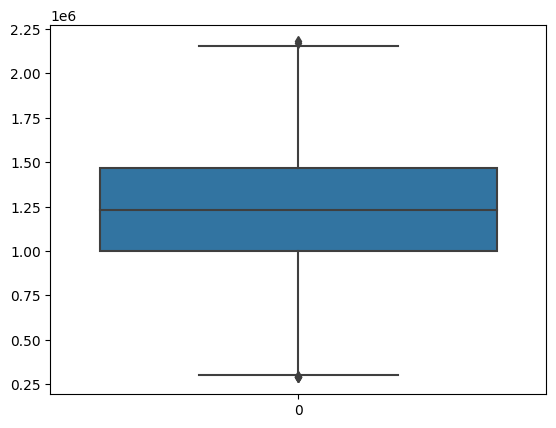

In [55]:
sns.boxplot(df_train["Price"])

Se muestra el gráfico de boxplot para la variable Price y se nota una mejoría en su distribución.

**Estadísticas los atributos en relación con la variable objetivo.**

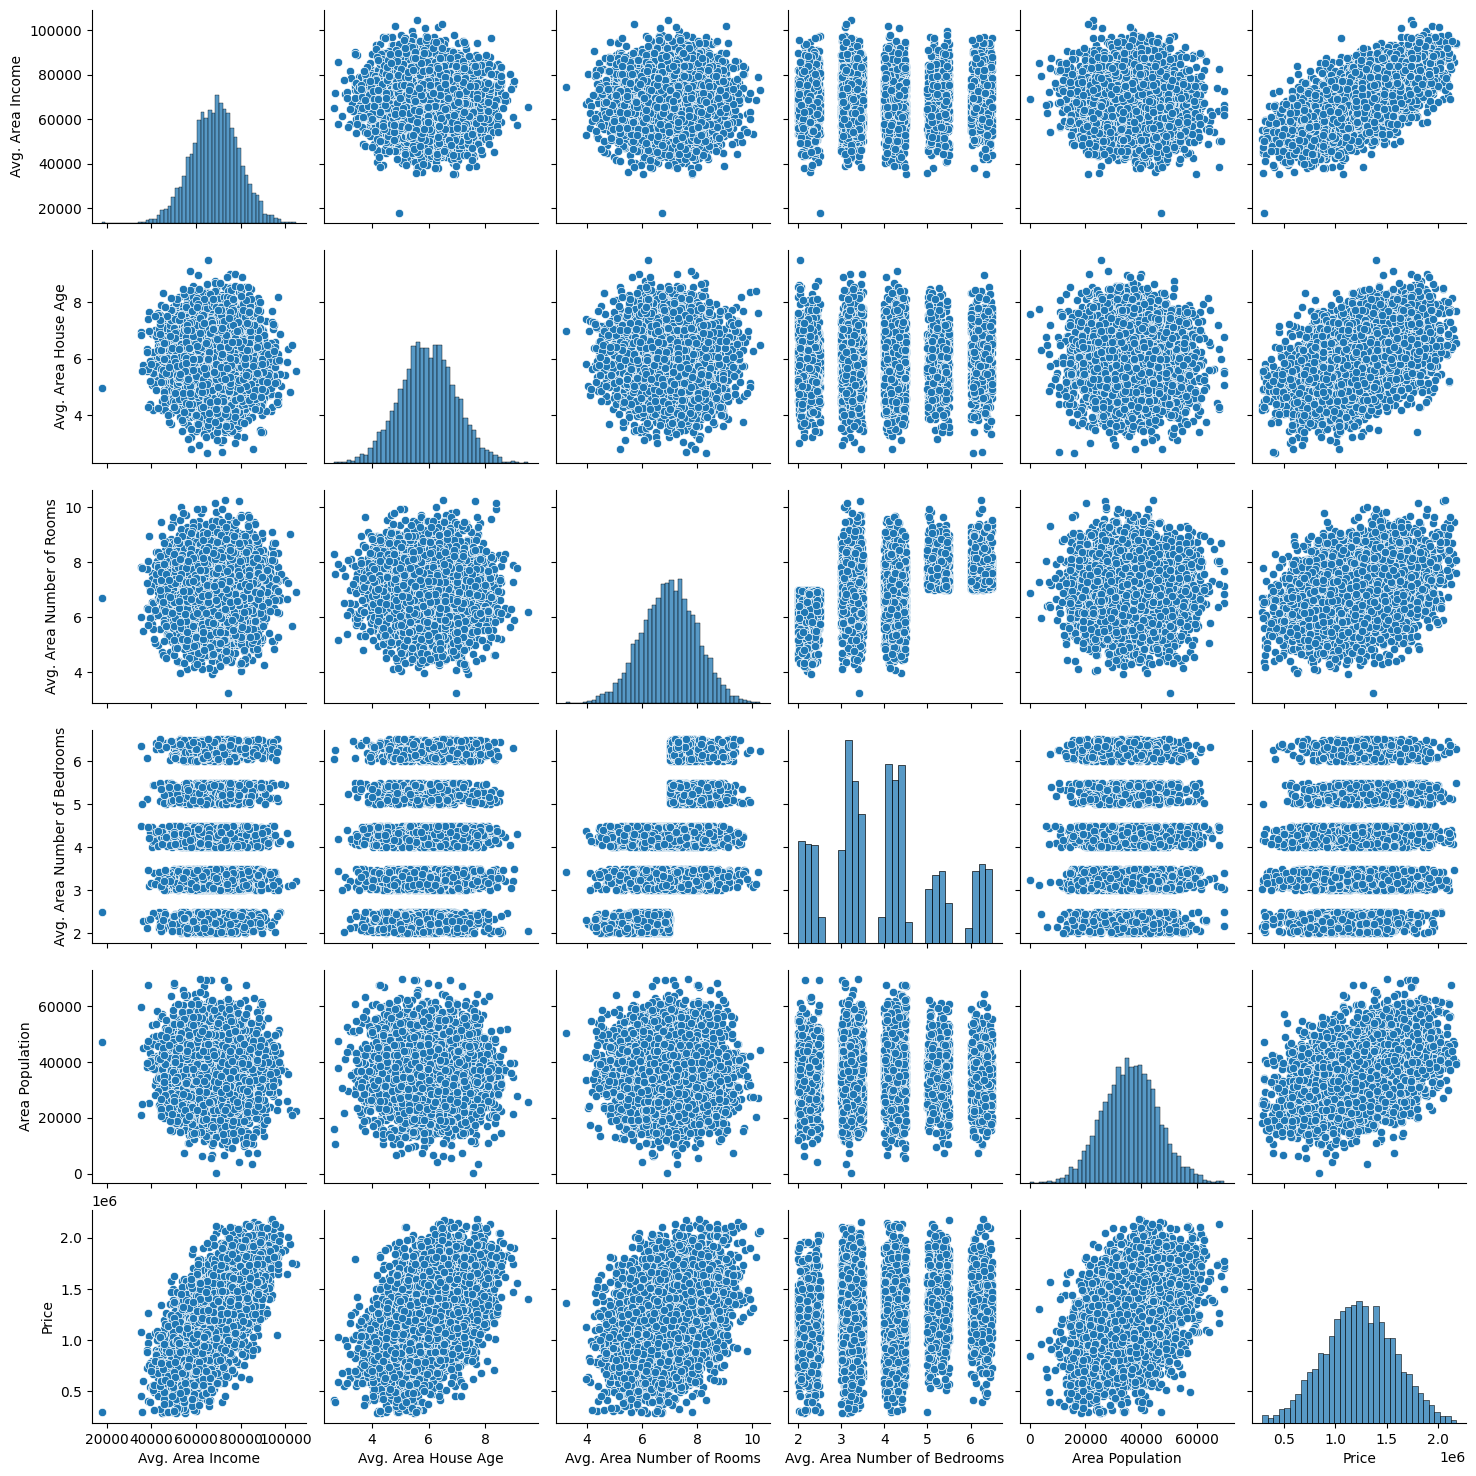

In [56]:
sns.pairplot(df_train)

Si nos ubicamos en la última fila, podemos observar la relación del target Price con las demás variables. A simple vista, se puede intuir una relación lineal entre Price y las demás variables a excepción de Número de dormitorios.

**Principales hallazagos encontrados:** Se identificó que la variable Price tenía 35 valores atípicos(Solucionado). Por otro lado, la relación entre Price y las demás variables podría ser lineal como se muestra en la gráfica anterior a excepción del número de dormitorios.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

<Axes: >

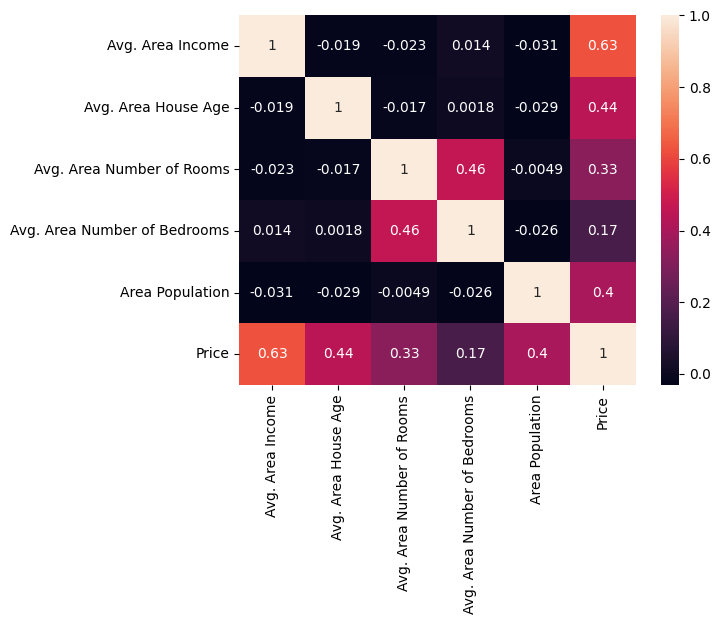

In [57]:
sns.heatmap(df_train.corr(),annot=True)

En mi caso, considero que una correlación por encima del 70% no es aceptable y se debería eliminar al menos una de las variables correlacionadas, pero para este caso no se tienen correlaciones elevadas entre las variables independientes. 

In [58]:
df_train.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.628043
Avg. Area House Age             0.443324
Area Population                 0.399836
Avg. Area Number of Rooms       0.327296
Avg. Area Number of Bedrooms    0.166561
Name: Price, dtype: float64

En este caso, la variable que más explica el precio de las casas es el ingreso promedio por área y el que menos es número promedio de dormitorios por área.

In [59]:
df_train.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,68544.642807,5.975073,6.987299,3.980052,36153.075174,1.230676e+06
std,10529.850867,0.987660,1.001037,1.234641,9893.689707,3.433926e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,2.873076e+05
25%,61492.921591,5.326798,6.301235,3.140000,29404.067583,9.988556e+05
50%,68785.854736,5.969127,7.002327,4.050000,36179.405767,1.232015e+06
75%,75706.680518,6.646560,7.665602,4.490000,42803.221409,1.468030e+06
max,104702.724257,9.519088,10.280022,6.500000,69621.713378,2.180066e+06


Como nuestras variables están en diferentes escalas, necesitamos estandarizarlas para evitar que el modelo de regresión no considere a las de menor escala debido a las grandes diferencias, como por ejemplo las variables "Avg. Area Number of Bedrooms"  y "Avg. Area Income"

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X = df_train.drop(columns = ["Price"])
y = df_train["Price"]

In [63]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## División del dataset en datos de entrenamiento y datos de test 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 0)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

In [66]:
# Código de la estructuración de la red
import tensorflow as tf
from tensorflow import keras

In [67]:
#Código de la inspección del modelo de red
def build_model():
  model = keras.Sequential()

  model.add(keras.layers.Dense(64, activation = "relu", input_dim = 5))
  model.add(keras.layers.Dense(32, activation = "relu"))
  model.add(keras.layers.Dense(16, activation = "relu"))
  model.add(keras.layers.Dense(1, activation = "linear"))

  model.compile(optimizer='adam',
              loss='mean_squared_error')
  return model

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [68]:
#Código de ajuste y entrenamiento
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                384       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
109/109 [==============================] - 1s 2ms/step - loss: 1629264281600.0000
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: 1628564881408.0000
Epoch 3/100
109/109 [==============================] - 0s 3ms/step - loss: 1623512842240.0000
Epoch 4/100
109/109 [==============================] - 0s 4ms/step - loss: 1605210603520.0000
Epoch 5/100
109/109 [==============================] - 0s 4ms/step - loss: 1560554242048.0000
Epoch 6/100
109/109 [==============================] - 0s 4ms/step - loss: 1474836824064.0000
Epoch 7/100
109/109 [==============================] - 0s 4ms/step - loss: 1335772708864.0000
Epoch 8/100
109/109 [==============================] - 0s 4ms/step - loss: 1140747141120.0000
Epoch 9/100
109/109 [==============================] - 0s 4ms/step - loss: 901491785728.0000
Epoch 10/100
109/109 [==============================] - 0s 3ms/step - loss: 647550074880.0000
Epoch 11/100
109/109 [==============================] - 0s 2m

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [70]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
y_pred_red = model.predict(X_test)

47/47 [==============================] - 0s 2ms/step


In [71]:
dif = pd.DataFrame(y_test).reset_index(drop = True)-pd.DataFrame(y_pred_red, columns = ["Price"])

## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [74]:
#Código de ajuste del modelo 1
from sklearn.linear_model import LinearRegression

In [75]:
reg=LinearRegression()

In [76]:
reg.fit(X_train,y_train)

LinearRegression()

In [77]:
y_pred_linear = reg.predict(X_test)

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [72]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
print("Métricas de desempeño - Modelo de red neuronal")
mse_red = sum(dif["Price"]**2)/len(y_test)
rmse_red = mse**1/2
mae_red = sum(abs(dif["Price"]))/len(y_test)
print("MSE:",mse_red)
print("RMSE",rmse_red)
print("MAE",mae_red)


Métricas de desempeño - Modelo de red neuronal
MSE: 10318637504.857227
RMSE 5155031496.974034
MAE 81475.97317653481


In [78]:
print("Métricas de desempeño - Modelo de regresión lineal múltiple")
mse_lineal = sum((y_test-y_pred_linear)**2)/len(y_test)
rmse_lineal = mse**1/2
mae_lineal = sum(abs(y_test-y_pred_linear))/len(y_test)
print ("MSE:",mse_lineal)
print("RMSE:",rmse_lineal)
print("MAE:",mae)

Métricas de desempeño - Modelo de regresión lineal múltiple
MSE: 9861120420.70117
RMSE: 5155031496.974034
MAE: 81452.35159146445


## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

**Discusión de los resultados**

- Se obtuvo menos error en predicción con el modelo de regresión lineal que con la red neuronal. Por lo tanto, el mejor modelo resultó ser el de regresión lineal.

- Se podría mejorar la red neuronal incrementando las capas intermedias o incrementando el número de neuronas por capa.
